# Segunda Entrega

## Representação da solução

Como a base está representada através de pontos que são os vértices e as arestas são as distâncias euclideanas para todos os pontos.
Resumindo, todos os pontos estão "conectados" por uma aresta de peso igual a distância euclideana entre eles.

### Heuristicas Construtivas do PCV
* Heuristica do vizinho mais próximo
* Heuristica da inserção do mais próximo
* Heuristica da inserção do mais distante

In [1]:
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

import os
import numpy as np
from math import sqrt

In [2]:
nome_de_instancias = os.listdir("./dataset/")[:-1]

In [3]:
file_name = "./dataset/" + nome_de_instancias[12]
with open(file_name, "r") as f:
    text = f.read().split("\n")[6:-1]

In [4]:
text[0], len(text)

('1 909444 143969', 1000)

In [5]:
coordenadas = []
for vertice in text:
    coordenadas.append(vertice.split(" "))

In [6]:
coordenadas[0], len(text)

(['1', '909444', '143969'], 1000)

In [7]:
coordenadas_np = np.array(coordenadas).astype("int")

In [8]:
coordenadas_np[0], coordenadas_np.shape

(array([     1, 909444, 143969]), (1000, 3))

In [39]:
pontos = []
for no_x_y in coordenadas_np:
    pontos.append([no_x_y[1], no_x_y[2]])
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 1000)

In [40]:
tamanho = 100
pontos = pontos[0:tamanho]
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 100)

# Arquivos com as instâncias aberto, agora criar  as funções

# Cálculo das distâncias

In [41]:
def dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def distancia_percurso(points):
    # Caso em que a lista é zero
    if len(points) == 0:
        return 0
    
    # Iniciando a distância com zero
    distancia_percurso = 0
    
    # Soma todos os pontos
    for i in range(len(points) - 1):
        distancia_percurso += dist(points[i], points[i + 1])
    
    # Soma a distância do último ponto com o primeiro
    distancia_percurso += dist(points[len(points)-1], points[0])
    return distancia_percurso

# Heuristica de Construção

In [42]:
def vizinhos_mais_proximos(array_points):
    
    points = list(array_points)
    
    if len(points) == 0:
        return []
    
    # Escolhe o vértice inicial
    current = points[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    nnpoints = [current]
    # Remove do conjuto total
    points.remove(current)
    # Repete até que o conjunto inicial acabe
    while len(points) > 0:
        next = points[0]
        # Escolhe um vértice u mais próximo de um dos extremos de C
        for point in points:
            if dist(current, point) < dist(current, next):
                next = point
        # Acrescenta o vértice no array
        nnpoints.append(next)
        # Remove do conjunto
        points.remove(next)
        # considera que o novo nó a ser utilizado será o do final
        current = next
        # Numeros faltantes de pontos
        print("Len points", len(points), end="\r")
    return nnpoints, distancia_percurso(nnpoints)

# Movimento de Vizinhança

## 2-OPT

In [43]:
def two_opt(array_points):
    points = list(array_points)
    
    melhor_ate_agora = list(points)
    print("Dist inicial:", distancia_percurso(melhor_ate_agora))
    
    for i in range(len(points) - 1):
        for j in range(i + 2, len(points) - 1):
            # Verifica se a troca de 2 arestas é vantajosa, se sim, troque pela menor
            if dist(points[i], points[i+1]) + dist(points[j], points[j+1]) > dist(points[i], points[j]) + dist(points[i+1], points[j+1]):          
                #print("vai dar swap")
                # SWAP 
                points[i+1:j+1] = reversed(points[i+1:j+1])
                #print(points[i+1:j+1], reversed(points[i+1:j+1]))
                if distancia_percurso(points) < distancia_percurso(melhor_ate_agora):
                    #print("pegou um")
                    melhor_ate_agora = points
                    continue
                else:
                    # RESWAP pois não é o melhor até agora
                    points[i+1:j+1] = reversed(points[i+1:j+1])

                    
    return melhor_ate_agora, distancia_percurso(melhor_ate_agora)

# Insertion

Escolhe um vértice, testa todas as posições em um array e retorna o primeiro array que foi melhor que o original.

First Improvement

In [44]:
def insertion(array_lista):
    if len(array_lista) < 0:
        raise ValueError("Lista vazia")
        
    lista = list(array_lista)
    melhor_ate_agora = distancia_percurso(lista)
    print("Distancia Da entrada: ", melhor_ate_agora)
    
    for i in range(len(lista)):
        #print("\n\ni == ", i)
        #print(lista)
        a = lista.pop(i)
        #print(a, "cut", lista)
        #print("Começando o 2º for")        
        for j in range(len(lista)+1):
            lista.insert(j, a)
            nova_distancia = distancia_percurso(lista)
            #print("#"*3, lista,"SUM =>", nova_distancia)
            #print("len", len(lista))
            if nova_distancia < melhor_ate_agora:
                melhor_ate_agora = nova_distancia
                #print(melhor_ate_agora)
                
                #Comente essa linha se deseja Best Improvement
                return lista, melhor_ate_agora
            else:
                # Removendo, já que não possui distância menor
                #pass
                lista.pop(j)
        lista.insert(i,a)
    return lista, melhor_ate_agora

# Processo de Criação

In [54]:
vmp_array, vmp_dist = vizinhos_mais_proximos(pontos)
print("Custo:", vmp_dist, vmp_array[0:5])

Custo: 5337905.746478797 [[909444, 143969], [889781, 96842], [864516, 97130], [862896, 89943], [846461, 76169]]


Array criado, nome de `vmp_array`, e custo de `vmp_dist`

## Benckmark com o Insertion

In [46]:
%time insertion_array , insertion_dist = insertion(vmp_array)
insertion_dist

Distancia Da entrada:  5337905.746478797
CPU times: user 11.5 ms, sys: 123 µs, total: 11.6 ms
Wall time: 11.1 ms


5332199.688797566

## Benckmark com o 2-OPT

In [47]:
%time two_opt_array, two_opt_dist = two_opt(vmp_array)
two_opt_dist

Dist inicial: 5337905.746478797
CPU times: user 59.3 ms, sys: 107 µs, total: 59.4 ms
Wall time: 57.1 ms


5301072.002634718

# VND (Variable Neighbourhood Descent)

In [48]:
def VND(array_lista, n_iteracoes):
    lista = list(array_lista)
    
    
    melhor_ate_agora = distancia_percurso(lista)
    print("Inicial:", melhor_ate_agora)
    while n_iteracoes >= 0:
        print("\n##", n_iteracoes ,"##\n")
        
        # Rodar insertion, caso for bom, rodo de novo
        insertion_array, insertion_dist= insertion(lista)
        
        print("Insertion:", insertion_dist, len(insertion_array))
        # Caso o Insertion for bom, volte pro Insertion
        if insertion_dist < melhor_ate_agora:
            melhor_ate_agora = insertion_dist
            lista = insertion_array
            n_iteracoes = n_iteracoes - 1
            continue
        
        
        # Se Insertion for ruim, rode o 2-OPT 
        lista_two_opt, two_opt_dist = two_opt(lista)
        print("2-OPT: ", two_opt_dist, len(two_opt_array))
        if two_opt_dist < melhor_ate_agora:
            melhor_ate_agora = two_opt_dist
            lista = lista_two_opt
            n_iteracoes = n_iteracoes - 1
            continue
        
        # Caso o Insertion e o 2-OPT for ruim, pare
        print("Insertion e 2-OPT sem sucesso")
        break
    return lista

In [19]:
resultado_vnd = VND(vmp_array, n_iteracoes=100)

Inicial: 5337905.746478797

## 100 ##

Distancia Da entrada:  5337905.746478797
Insertion: 5332199.688797566 100

## 99 ##

Distancia Da entrada:  5332199.688797566
Insertion: 5332199.688797565 100

## 98 ##

Distancia Da entrada:  5332199.688797565
Insertion: 5328827.586140712 100

## 97 ##

Distancia Da entrada:  5328827.586140712
Insertion: 5325001.389797148 100

## 96 ##

Distancia Da entrada:  5325001.389797148
Insertion: 5321639.922121451 100

## 95 ##

Distancia Da entrada:  5321639.922121451
Insertion: 5286545.555487686 100

## 94 ##

Distancia Da entrada:  5286545.555487686
Insertion: 5195060.307651321 100

## 93 ##

Distancia Da entrada:  5195060.307651321
Insertion: 5189226.260056689 100

## 92 ##

Distancia Da entrada:  5189226.260056689
Insertion: 5189167.941860838 100

## 91 ##

Distancia Da entrada:  5189167.941860838
Insertion: 5182816.187139595 100

## 90 ##

Distancia Da entrada:  5182816.187139595
Insertion: 5182387.022239928 100

## 89 ##

Distancia Da entrada:  518

# Gráficos

## Construção original

In [49]:
vmp_array_x = []
vmp_array_y = []
for i in vmp_array:
    vmp_array_x.append(i[0])
    vmp_array_y.append(i[1])

## Resultado do VND

In [50]:
resultado_vnd_x = []
resultado_vnd_y = []
for i in resultado_vnd:
    resultado_vnd_x.append(i[0])
    resultado_vnd_y.append(i[1])

<IPython.core.display.Javascript object>


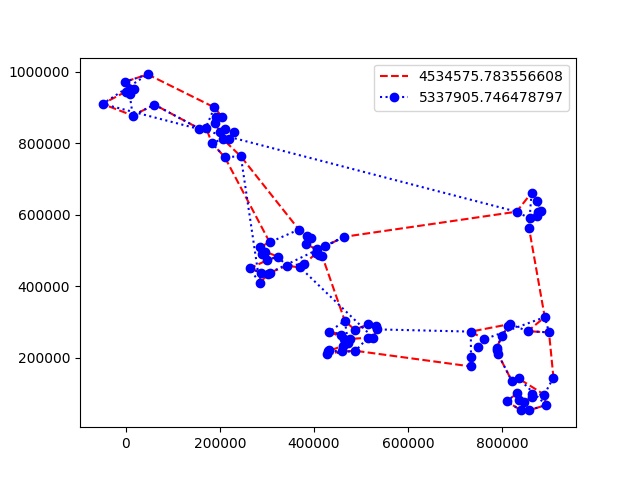

In [51]:
#plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(resultado_vnd_x,resultado_vnd_y ,'r--', label=str(distancia_percurso(resultado_vnd)))
plt.plot(vmp_array_x,vmp_array_y ,'ob:', label=str(vmp_dist))
plt.legend()
plt.show()

# Aplicando GRASP

## construcao_solucao(alfa)

### lista_de_candidatos(LC)

Lista de candidatos criada aleatóriamente

### Lista restrita de candidatos(LRC)

Criada através da restrição setada por alfa [0,1)

O tamanho de LCR é determinado por:

Cardinalidade LCR = $\alpha$ * Cardinalidade LC



In [80]:
def GRASP(N_iteracoes_GRASP, N_iteracoes_VND, alfa):
    for i in range(N_iteracoes_GRASP):
        # Constroi um caminho com base na aleatoriedade
        solucao = construcao_solucao(alfa)
        
        # Algorítimo de 'busca_local'
        solucao = VND(solucao, N_iteracoes_VND)

        # Memoriza melhor solucao
        melhores_solucoes = []
        melhores_solucoes.append(solucao)
    return melhores_solucoes

In [58]:
import random
#pontos = [[12-i, i] for i in range(12)]
alfa = 0.1
random.seed(42)
def construcao_solucao(alfa):
    caminho = list(pontos)    
    if len(caminho) == 0:
        raise ValueError()

    # Escolhe o vértice inicial
    current = caminho[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    solucao = [current]

    # Remove do conjuto total
    caminho.remove(current)

    # Repete até que o conjunto inicial acabe
    while len(caminho) > 0:

        # Escolhe um nó para ser analisado
        vertice = caminho[0]

        #print("\n\n", len(caminho), vertice, "\n\n")



        # Criar lista de candidatos, com base nos outros que não foram visitados
        if len(caminho) >= 2:
            lista_candidatos = list(caminho[1:])
        if len(caminho) == 2:
            # Acrescenta o vértice no array
            solucao.append(vertice)
            #print("solucao: ", solucao)
            # Remove do conjunto
            #print("\n n, t:", next, type(next), caminho)
            caminho.remove(vertice)
        if len(caminho) == 1:
            # Acrescenta o vértice no array
            solucao.append(vertice)
            #print("solucao: ", solucao)
            # Remove do conjunto
            #print("\n n, t:", next, type(next), caminho)
            #caminho.remove(vertice)


        # Lista que armazenará os candidatos em ordem crescente de distancia do vertice
        lista_candidatos_restrita = []

        #################################################################################    
        # Criar lista de candidatos ordenada

        # Para cada candidato na lista_candidatos:
        for candidato in lista_candidatos:

            # Calcule a distancia do nó atual aos outros
            distancia_candidato_vertice = dist(vertice, candidato)

            #print("vert" , vertice, "->", "C", candidato, distancia_candidato_vertice)

            # Adicione na lista_candidatos_restrita a lista [x, y, distancia_candidato_vertice]
            lista_candidatos_restrita.append([*candidato, distancia_candidato_vertice])    

        # Após todos os valores adicionados, ordene pela coluna das distancias
        lista_candidatos_restrita.sort(key=lambda x: x[2])

        ###################################################################################

        #print("Lista de candidatos restrita:\n", lista_candidatos_restrita, "\n")

        # Coluna removida e passada pra lista de novo
        lista_candidatos_restrita_np = np.delete(lista_candidatos_restrita, 2, 1)

        # De volta para lista, agora ordenada sem a coluna de distância
        lista_candidatos_restrita = list(lista_candidatos_restrita_np)
        #print(type(lista_candidatos_restrita))

        # Escolher um candidato usando a função aleatória
        indice_valor = random.randrange(0, int(alfa*len(lista_candidatos_restrita)+1))
        vertice = list(lista_candidatos_restrita[indice_valor].astype(int))

        # Acrescenta o vértice no array
        solucao.append(vertice)
        #print("solucao: ", solucao)


        # Remove do conjunto
        #print("\n n, t:", next, type(next), caminho)
        caminho.remove(vertice)

        # considera que o novo nó a ser utilizado será o do final
        current = vertice

        # Numeros faltantes de pontos
        #print("Len caminho", len(caminho), end="\r")
    return solucao

In [77]:
alfa = 0.9
construcao_solucao(alfa), 
distancia_percurso(construcao_solucao(0)) - distancia_percurso(construcao_solucao(0.9))

-28272515.126481723

In [86]:
melhores_solucoes = GRASP(100, 20, 0.3)

Inicial: 30136867.613754176

## 20 ##

Distancia Da entrada:  30136867.613754176
Insertion: 29719281.6893675 101

## 19 ##

Distancia Da entrada:  29719281.6893675
Insertion: 29710797.9182325 101

## 18 ##

Distancia Da entrada:  29710797.9182325
Insertion: 29665787.707421612 101

## 17 ##

Distancia Da entrada:  29665787.707421612
Insertion: 29636454.336175095 101

## 16 ##

Distancia Da entrada:  29636454.336175095
Insertion: 29579565.87748261 101

## 15 ##

Distancia Da entrada:  29579565.87748261
Insertion: 29193586.5815133 101

## 14 ##

Distancia Da entrada:  29193586.5815133
Insertion: 29184906.25006205 101

## 13 ##

Distancia Da entrada:  29184906.25006205
Insertion: 28777161.751878053 101

## 12 ##

Distancia Da entrada:  28777161.751878053
Insertion: 28758244.328403015 101

## 11 ##

Distancia Da entrada:  28758244.328403015
Insertion: 28754049.70330791 101

## 10 ##

Distancia Da entrada:  28754049.70330791
Insertion: 28710831.782385424 101

## 9 ##

Distancia Da entrada:  

Inicial: 30788398.462691925

## 20 ##

Distancia Da entrada:  30788398.462691925
Insertion: 30732746.718231 101

## 19 ##

Distancia Da entrada:  30732746.718231
Insertion: 30720113.214047235 101

## 18 ##

Distancia Da entrada:  30720113.214047235
Insertion: 30718163.78982161 101

## 17 ##

Distancia Da entrada:  30718163.78982161
Insertion: 30707883.472881664 101

## 16 ##

Distancia Da entrada:  30707883.472881664
Insertion: 30707812.063468825 101

## 15 ##

Distancia Da entrada:  30707812.063468825
Insertion: 30293930.737684347 101

## 14 ##

Distancia Da entrada:  30293930.737684347
Insertion: 30280845.262676805 101

## 13 ##

Distancia Da entrada:  30280845.262676805
Insertion: 30278828.376846675 101

## 12 ##

Distancia Da entrada:  30278828.376846675
Insertion: 30218420.644709196 101

## 11 ##

Distancia Da entrada:  30218420.644709196
Insertion: 30217524.494434796 101

## 10 ##

Distancia Da entrada:  30217524.494434796
Insertion: 29793230.479229767 101

## 9 ##

Distancia Da 

Insertion: 30806829.700935625 101

## 0 ##

Distancia Da entrada:  30806829.700935625
Insertion: 30698090.173392437 101
Inicial: 28409268.754386496

## 20 ##

Distancia Da entrada:  28409268.754386496
Insertion: 28317508.06759942 101

## 19 ##

Distancia Da entrada:  28317508.06759942
Insertion: 28308896.527538095 101

## 18 ##

Distancia Da entrada:  28308896.527538095
Insertion: 28291288.18443613 101

## 17 ##

Distancia Da entrada:  28291288.18443613
Insertion: 28284336.49340854 101

## 16 ##

Distancia Da entrada:  28284336.49340854
Insertion: 28280572.103536647 101

## 15 ##

Distancia Da entrada:  28280572.103536647
Insertion: 28044591.49250694 101

## 14 ##

Distancia Da entrada:  28044591.49250694
Insertion: 27996759.5659673 101

## 13 ##

Distancia Da entrada:  27996759.5659673
Insertion: 27957135.953018922 101

## 12 ##

Distancia Da entrada:  27957135.953018922
Insertion: 27929752.875255916 101

## 11 ##

Distancia Da entrada:  27929752.875255916
Insertion: 27908061.03991804

Inicial: 31939914.75722827

## 20 ##

Distancia Da entrada:  31939914.75722827
Insertion: 31449165.82699654 101

## 19 ##

Distancia Da entrada:  31449165.82699654
Insertion: 31443345.44931627 101

## 18 ##

Distancia Da entrada:  31443345.44931627
Insertion: 31422660.623304013 101

## 17 ##

Distancia Da entrada:  31422660.623304013
Insertion: 31421748.265882716 101

## 16 ##

Distancia Da entrada:  31421748.265882716
Insertion: 30947252.31692404 101

## 15 ##

Distancia Da entrada:  30947252.31692404
Insertion: 30912137.590880632 101

## 14 ##

Distancia Da entrada:  30912137.590880632
Insertion: 30911391.38167453 101

## 13 ##

Distancia Da entrada:  30911391.38167453
Insertion: 30518988.10713679 101

## 12 ##

Distancia Da entrada:  30518988.10713679
Insertion: 30487617.297208484 101

## 11 ##

Distancia Da entrada:  30487617.297208484
Insertion: 30433731.92649308 101

## 10 ##

Distancia Da entrada:  30433731.92649308
Insertion: 30432024.592296127 101

## 9 ##

Distancia Da entrad

Insertion: 28438279.13183736 101

## 2 ##

Distancia Da entrada:  28438279.13183736
Insertion: 28380866.673527144 101

## 1 ##

Distancia Da entrada:  28380866.673527144
Insertion: 28364482.052046344 101

## 0 ##

Distancia Da entrada:  28364482.052046344
Insertion: 28352106.06535688 101
Inicial: 31470163.360692468

## 20 ##

Distancia Da entrada:  31470163.360692468
Insertion: 31470103.48959321 101

## 19 ##

Distancia Da entrada:  31470103.48959321
Insertion: 31445632.713056013 101

## 18 ##

Distancia Da entrada:  31445632.713056013
Insertion: 31444099.240491975 101

## 17 ##

Distancia Da entrada:  31444099.240491975
Insertion: 31013657.792094667 101

## 16 ##

Distancia Da entrada:  31013657.792094667
Insertion: 30993266.16751006 101

## 15 ##

Distancia Da entrada:  30993266.16751006
Insertion: 30933761.96565963 101

## 14 ##

Distancia Da entrada:  30933761.96565963
Insertion: 30510131.995854165 101

## 13 ##

Distancia Da entrada:  30510131.995854165
Insertion: 30497086.9537794

Inicial: 27704778.504438393

## 20 ##

Distancia Da entrada:  27704778.504438393
Insertion: 27692972.066504836 101

## 19 ##

Distancia Da entrada:  27692972.066504836
Insertion: 27612736.19577252 101

## 18 ##

Distancia Da entrada:  27612736.19577252
Insertion: 27178220.289055925 101

## 17 ##

Distancia Da entrada:  27178220.289055925
Insertion: 27172772.919929497 101

## 16 ##

Distancia Da entrada:  27172772.919929497
Insertion: 26732922.99471818 101

## 15 ##

Distancia Da entrada:  26732922.99471818
Insertion: 26725446.956027854 101

## 14 ##

Distancia Da entrada:  26725446.956027854
Insertion: 26715028.83765331 101

## 13 ##

Distancia Da entrada:  26715028.83765331
Insertion: 26633482.387322262 101

## 12 ##

Distancia Da entrada:  26633482.387322262
Insertion: 26625158.215782233 101

## 11 ##

Distancia Da entrada:  26625158.215782233
Insertion: 26608258.96347595 101

## 10 ##

Distancia Da entrada:  26608258.96347595
Insertion: 26598606.227785375 101

## 9 ##

Distancia Da 

Inicial: 31465886.878240984

## 20 ##

Distancia Da entrada:  31465886.878240984
Insertion: 31435496.004565313 101

## 19 ##

Distancia Da entrada:  31435496.004565313
Insertion: 31409322.643252138 101

## 18 ##

Distancia Da entrada:  31409322.643252138
Insertion: 30998469.278311644 101

## 17 ##

Distancia Da entrada:  30998469.278311644
Insertion: 30990782.947652 101

## 16 ##

Distancia Da entrada:  30990782.947652
Insertion: 30972065.017135967 101

## 15 ##

Distancia Da entrada:  30972065.017135967
Insertion: 30959745.940966588 101

## 14 ##

Distancia Da entrada:  30959745.940966588
Insertion: 30601348.995405365 101

## 13 ##

Distancia Da entrada:  30601348.995405365
Insertion: 30598259.420754507 101

## 12 ##

Distancia Da entrada:  30598259.420754507
Insertion: 30554923.567876253 101

## 11 ##

Distancia Da entrada:  30554923.567876253
Insertion: 30538328.371115714 101

## 10 ##

Distancia Da entrada:  30538328.371115714
Insertion: 30508333.72087917 101

## 9 ##

Distancia Da

Insertion: 28789732.404556666 101

## 9 ##

Distancia Da entrada:  28789732.404556666
Insertion: 28788943.996536728 101

## 8 ##

Distancia Da entrada:  28788943.996536728
Insertion: 28708279.276424624 101

## 7 ##

Distancia Da entrada:  28708279.276424624
Insertion: 28698815.547928352 101

## 6 ##

Distancia Da entrada:  28698815.547928352
Insertion: 28696148.173821248 101

## 5 ##

Distancia Da entrada:  28696148.173821248
Insertion: 28689545.71311733 101

## 4 ##

Distancia Da entrada:  28689545.71311733
Insertion: 28689417.165377088 101

## 3 ##

Distancia Da entrada:  28689417.165377088
Insertion: 28272490.00316886 101

## 2 ##

Distancia Da entrada:  28272490.00316886
Insertion: 28272145.91830557 101

## 1 ##

Distancia Da entrada:  28272145.91830557
Insertion: 28272145.918305565 101

## 0 ##

Distancia Da entrada:  28272145.918305565
Insertion: 28215037.198148802 101
Inicial: 30523918.93634815

## 20 ##

Distancia Da entrada:  30523918.93634815
Insertion: 30128022.75057641 101


Insertion: 35775173.666991845 101

## 7 ##

Distancia Da entrada:  35775173.666991845
Insertion: 35240766.44225037 101

## 6 ##

Distancia Da entrada:  35240766.44225037
Insertion: 35231208.29296904 101

## 5 ##

Distancia Da entrada:  35231208.29296904
Insertion: 35228462.763043046 101

## 4 ##

Distancia Da entrada:  35228462.763043046
Insertion: 35205336.384733535 101

## 3 ##

Distancia Da entrada:  35205336.384733535
Insertion: 35203771.71062316 101

## 2 ##

Distancia Da entrada:  35203771.71062316
Insertion: 35188220.66483771 101

## 1 ##

Distancia Da entrada:  35188220.66483771
Insertion: 35164796.585603505 101

## 0 ##

Distancia Da entrada:  35164796.585603505
Insertion: 35164796.5856035 101
Inicial: 30671231.488652717

## 20 ##

Distancia Da entrada:  30671231.488652717
Insertion: 30648011.908872698 101

## 19 ##

Distancia Da entrada:  30648011.908872698
Insertion: 30605767.28632937 101

## 18 ##

Distancia Da entrada:  30605767.28632937
Insertion: 30212992.771510854 101



Inicial: 33502953.999148224

## 20 ##

Distancia Da entrada:  33502953.999148224
Insertion: 32647715.864495296 101

## 19 ##

Distancia Da entrada:  32647715.864495296
Insertion: 32641065.039308865 101

## 18 ##

Distancia Da entrada:  32641065.039308865
Insertion: 32638504.370294567 101

## 17 ##

Distancia Da entrada:  32638504.370294567
Insertion: 32636886.547246885 101

## 16 ##

Distancia Da entrada:  32636886.547246885
Insertion: 32548016.394131735 101

## 15 ##

Distancia Da entrada:  32548016.394131735
Insertion: 32540966.138389442 101

## 14 ##

Distancia Da entrada:  32540966.138389442
Insertion: 32531842.279888533 101

## 13 ##

Distancia Da entrada:  32531842.279888533
Insertion: 32093301.43785667 101

## 12 ##

Distancia Da entrada:  32093301.43785667
Insertion: 32091497.70716867 101

## 11 ##

Distancia Da entrada:  32091497.70716867
Insertion: 32089281.68430406 101

## 10 ##

Distancia Da entrada:  32089281.68430406
Insertion: 32071330.401813716 101

## 9 ##

Distancia D

Inicial: 33133378.130492445

## 20 ##

Distancia Da entrada:  33133378.130492445
Insertion: 32667134.74311576 101

## 19 ##

Distancia Da entrada:  32667134.74311576
Insertion: 32666986.61593637 101

## 18 ##

Distancia Da entrada:  32666986.61593637
Insertion: 32608999.04480615 101

## 17 ##

Distancia Da entrada:  32608999.04480615
Insertion: 32527382.766586088 101

## 16 ##

Distancia Da entrada:  32527382.766586088
Insertion: 32099458.24523425 101

## 15 ##

Distancia Da entrada:  32099458.24523425
Insertion: 32097362.829277944 101

## 14 ##

Distancia Da entrada:  32097362.829277944
Insertion: 32046014.585428994 101

## 13 ##

Distancia Da entrada:  32046014.585428994
Insertion: 32044635.588305604 101

## 12 ##

Distancia Da entrada:  32044635.588305604
Insertion: 31985414.635195445 101

## 11 ##

Distancia Da entrada:  31985414.635195445
Insertion: 31616978.38215834 101

## 10 ##

Distancia Da entrada:  31616978.38215834
Insertion: 31566680.984390706 101

## 9 ##

Distancia Da en

Insertion: 28701601.219021972 101

## 3 ##

Distancia Da entrada:  28701601.219021972
Insertion: 28698184.98694253 101

## 2 ##

Distancia Da entrada:  28698184.98694253
Insertion: 28696435.00545298 101

## 1 ##

Distancia Da entrada:  28696435.00545298
Insertion: 28683866.398316782 101

## 0 ##

Distancia Da entrada:  28683866.398316782
Insertion: 28637013.11150833 101
Inicial: 33986515.092168845

## 20 ##

Distancia Da entrada:  33986515.092168845
Insertion: 33973150.72559774 101

## 19 ##

Distancia Da entrada:  33973150.72559774
Insertion: 33947152.04961885 101

## 18 ##

Distancia Da entrada:  33947152.04961885
Insertion: 33944246.898682974 101

## 17 ##

Distancia Da entrada:  33944246.898682974
Insertion: 33941717.456633456 101

## 16 ##

Distancia Da entrada:  33941717.456633456
Insertion: 33856877.252137065 101

## 15 ##

Distancia Da entrada:  33856877.252137065
Insertion: 33848774.625412636 101

## 14 ##

Distancia Da entrada:  33848774.625412636
Insertion: 33422867.55120021

Inicial: 28837835.79580147

## 20 ##

Distancia Da entrada:  28837835.79580147
Insertion: 28479917.006150775 101

## 19 ##

Distancia Da entrada:  28479917.006150775
Insertion: 28476886.73662893 101

## 18 ##

Distancia Da entrada:  28476886.73662893
Insertion: 28007037.43358063 101

## 17 ##

Distancia Da entrada:  28007037.43358063
Insertion: 27950331.7202736 101

## 16 ##

Distancia Da entrada:  27950331.7202736
Insertion: 27932244.337741077 101

## 15 ##

Distancia Da entrada:  27932244.337741077
Insertion: 27928214.091276903 101

## 14 ##

Distancia Da entrada:  27928214.091276903
Insertion: 27913764.928104747 101

## 13 ##

Distancia Da entrada:  27913764.928104747
Insertion: 27871472.89653276 101

## 12 ##

Distancia Da entrada:  27871472.89653276
Insertion: 27865708.684216462 101

## 11 ##

Distancia Da entrada:  27865708.684216462
Insertion: 27833093.911700144 101

## 10 ##

Distancia Da entrada:  27833093.911700144
Insertion: 27828184.892524496 101

## 9 ##

Distancia Da entr

Inicial: 32743018.507731717

## 20 ##

Distancia Da entrada:  32743018.507731717
Insertion: 32711941.289182022 101

## 19 ##

Distancia Da entrada:  32711941.289182022
Insertion: 32646910.80761086 101

## 18 ##

Distancia Da entrada:  32646910.80761086
Insertion: 32567257.04807973 101

## 17 ##

Distancia Da entrada:  32567257.04807973
Insertion: 32549921.638118424 101

## 16 ##

Distancia Da entrada:  32549921.638118424
Insertion: 32536626.729565144 101

## 15 ##

Distancia Da entrada:  32536626.729565144
Insertion: 32470428.870207567 101

## 14 ##

Distancia Da entrada:  32470428.870207567
Insertion: 32466156.970302843 101

## 13 ##

Distancia Da entrada:  32466156.970302843
Insertion: 31661076.090383414 101

## 12 ##

Distancia Da entrada:  31661076.090383414
Insertion: 31660467.998211052 101

## 11 ##

Distancia Da entrada:  31660467.998211052
Insertion: 31617215.17073142 101

## 10 ##

Distancia Da entrada:  31617215.17073142
Insertion: 31595266.262515284 101

## 9 ##

Distancia D

Inicial: 28922587.12902258

## 20 ##

Distancia Da entrada:  28922587.12902258
Insertion: 28435204.06027544 101

## 19 ##

Distancia Da entrada:  28435204.06027544
Insertion: 28432349.94904608 101

## 18 ##

Distancia Da entrada:  28432349.94904608
Insertion: 28381320.21359083 101

## 17 ##

Distancia Da entrada:  28381320.21359083
Insertion: 28364093.45347829 101

## 16 ##

Distancia Da entrada:  28364093.45347829
Insertion: 28340716.358734906 101

## 15 ##

Distancia Da entrada:  28340716.358734906
Insertion: 28335120.795809217 101

## 14 ##

Distancia Da entrada:  28335120.795809217
Insertion: 28283556.146939784 101

## 13 ##

Distancia Da entrada:  28283556.146939784
Insertion: 27823241.933530394 101

## 12 ##

Distancia Da entrada:  27823241.933530394
Insertion: 27796142.9754482 101

## 11 ##

Distancia Da entrada:  27796142.9754482
Insertion: 27739504.71718895 101

## 10 ##

Distancia Da entrada:  27739504.71718895
Insertion: 27737818.441836204 101

## 9 ##

Distancia Da entrada:

Inicial: 32080009.803247266

## 20 ##

Distancia Da entrada:  32080009.803247266
Insertion: 31676094.60139388 101

## 19 ##

Distancia Da entrada:  31676094.60139388
Insertion: 31661414.54376761 101

## 18 ##

Distancia Da entrada:  31661414.54376761
Insertion: 31643327.161235087 101

## 17 ##

Distancia Da entrada:  31643327.161235087
Insertion: 31637526.92254243 101

## 16 ##

Distancia Da entrada:  31637526.92254243
Insertion: 31619090.666385863 101

## 15 ##

Distancia Da entrada:  31619090.666385863
Insertion: 31543993.00627644 101

## 14 ##

Distancia Da entrada:  31543993.00627644
Insertion: 31200397.46951095 101

## 13 ##

Distancia Da entrada:  31200397.46951095
Insertion: 31173426.425285053 101

## 12 ##

Distancia Da entrada:  31173426.425285053
Insertion: 31162391.21560724 101

## 11 ##

Distancia Da entrada:  31162391.21560724
Insertion: 31161801.37225868 101

## 10 ##

Distancia Da entrada:  31161801.37225868
Insertion: 31147222.25123758 101

## 9 ##

Distancia Da entrada

Insertion: 28181144.05730941 101

## 1 ##

Distancia Da entrada:  28181144.05730941
Insertion: 28181101.327085286 101

## 0 ##

Distancia Da entrada:  28181101.327085286
Insertion: 28176496.301443376 101
Inicial: 31893256.20566811

## 20 ##

Distancia Da entrada:  31893256.20566811
Insertion: 31595686.27349359 101

## 19 ##

Distancia Da entrada:  31595686.27349359
Insertion: 31569948.588588554 101

## 18 ##

Distancia Da entrada:  31569948.588588554
Insertion: 31413088.90042838 101

## 17 ##

Distancia Da entrada:  31413088.90042838
Insertion: 31392360.54389993 101

## 16 ##

Distancia Da entrada:  31392360.54389993
Insertion: 31392084.30137761 101

## 15 ##

Distancia Da entrada:  31392084.30137761
Insertion: 31368231.404026818 101

## 14 ##

Distancia Da entrada:  31368231.404026818
Insertion: 31010474.505624767 101

## 13 ##

Distancia Da entrada:  31010474.505624767
Insertion: 31010443.370023403 101

## 12 ##

Distancia Da entrada:  31010443.370023403
Insertion: 30965441.29600426 

In [91]:
melhores_solucoes = np.array(melhores_solucoes)
melhores_solucoes_x = []
melhores_solucoes_y = []
for i in melhores_solucoes[0]:
    melhores_solucoes_x.append(i[0])
    melhores_solucoes_y.append(i[1])
melhores_solucoes.shape

(1, 101, 2)

<IPython.core.display.Javascript object>


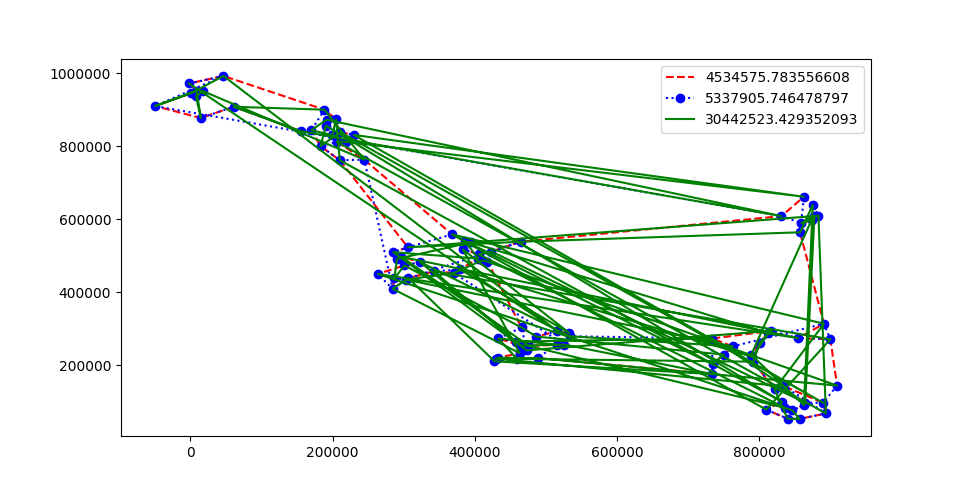

In [89]:
#plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(resultado_vnd_x,resultado_vnd_y ,'r--', label=str(distancia_percurso(resultado_vnd)))
plt.plot(vmp_array_x,vmp_array_y ,'ob:', label=str(vmp_dist))
plt.plot(melhores_solucoes_x,melhores_solucoes_y ,'g-', label=str(distancia_percurso(melhores_solucoes[0])))
plt.legend()
plt.show()